In [1]:
import pandas as pd

In [211]:
from matplotlib import pyplot as plt

In [158]:
import numpy as np

In [2]:
df = pd.read_csv('Red_Light_Camera_Violations_2020.csv')

In [3]:
df

,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,MARCH,...,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId
0,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5028499.542,Eastbound,3.0,NaN,NaN,...,NaN,45.0,46,72,56,66,66,354,72,1
1,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5030578.562,Southbound,26.0,29.0,30.0,...,39.0,31.0,35,29,31,26,16,357,45,2
2,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5020476.478,Northbound,40.0,36.0,17.0,...,55.0,62.0,55,45,32,42,34,480,62,3
3,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5030188.565,Westbound,NaN,NaN,NaN,...,5.0,54.0,49,39,26,36,14,223,54,4
4,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5025325.524,Westbound,36.0,32.0,18.0,...,26.0,36.0,29,22,19,15,22,280,36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,BANK @ HUNT CLUB,2020,45.353631,-75.647331,371608.7310,5024096.514,Northbound,NaN,NaN,NaN,...,NaN,NaN,2,12,16,5,14,49,16,57
57,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,2020,45.410594,-75.689464,368243.7110,5030392.564,Southbound,NaN,NaN,NaN,...,NaN,NaN,3,12,9,10,10,44,12,58
58,CARLING @ IROQUOIS,2020,45.371820,-75.767003,362213.6860,5026025.530,Eastbound,NaN,NaN,NaN,...,NaN,NaN,56,141,116,82,59,454,141,59
59,KING EDWARD @ BESSERER,2020,45.428093,-75.685291,368550.7052,5032340.582,Northbound,NaN,NaN,NaN,...,213.0,239.0,251,225,158,164,7,1419,251,60


# Question 1) Which month(s) see the most number of violations?

**Beginning to look at the data from the monthly question perspective:**

*Looking at mean of number of redlight violations in a given month; NaN (null values) are not counted:*

<span style="color:gray; font-size:0.9em;">a new "df"/series does not need to be made in order to add a new column to the original df</span>

In [391]:
monthly_avg = df.mean(axis=0, numeric_only=True)
monthly_avg

CAMERA_INSTALL_YEAR      2.012213e+03
LATITUDE                 4.539396e+01
LONGITUDE               -7.567517e+01
X                        3.693779e+05
Y                        5.028559e+06
JANUARY                  5.685714e+01
FEBRUARY                 5.222917e+01
MARCH                    4.220833e+01
APRIL                    2.710417e+01
MAY                      5.491837e+01
JUNE                     7.356000e+01
JULY                     8.259615e+01
AUGUST                   7.557377e+01
SEPTEMBER                6.600000e+01
OCTOBER                  4.959016e+01
NOVEMBER                 4.281967e+01
DECEMBER                 3.278689e+01
TOTAL_VIOLATIONS         5.829016e+02
HIGHEST_MONTHLY_TOTAL    9.122951e+01
ObjectId                 3.100000e+01
NaN_Months               1.360656e+00
Active_Months            1.063934e+01
Avg_Monthly              3.100000e+01
Highest_Monthly_Rnk      3.100000e+01
Mean_Monthly_Rnk         3.100000e+01
Mean_Active_Months       5.327039e+01
dtype: float

*The months column will be called upon a lot for the code, so a new variable will be created:*

In [289]:
MONTH_COLUMNS = ['JANUARY', 'FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

*Counting number of data points (without counting null values) for each month*

In [290]:
61-df[MONTH_COLUMNS].isna().sum()

JANUARY      49
FEBRUARY     48
MARCH        48
APRIL        48
MAY          49
JUNE         50
JULY         52
AUGUST       61
SEPTEMBER    61
OCTOBER      61
NOVEMBER     61
DECEMBER     61
dtype: int64

*Filling in NaN (null values) with zero, to compute new mean:*

In [392]:
null_zero_df = df.fillna(0)
null_zero_df

,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,MARCH,...,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId,NaN_Months,Active_Months,Avg_Monthly,Highest_Monthly_Rnk,Mean_Monthly_Rnk,Mean_Active_Months
0,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5028499.542,Eastbound,3.0,0.0,0.0,...,66,354,72,1,5,7,22.0,27.5,22.0,50.571429
1,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5030578.562,Southbound,26.0,29.0,30.0,...,16,357,45,2,0,12,39.0,42.0,39.0,29.750000
2,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5020476.478,Northbound,40.0,36.0,17.0,...,34,480,62,3,0,12,29.0,32.0,29.0,40.000000
3,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5030188.565,Westbound,0.0,0.0,0.0,...,14,223,54,4,5,7,38.0,37.0,38.0,31.857143
4,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5025325.524,Westbound,36.0,32.0,18.0,...,22,280,36,5,0,12,46.0,47.0,46.0,23.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,BANK @ HUNT CLUB,2020,45.353631,-75.647331,371608.7310,5024096.514,Northbound,0.0,0.0,0.0,...,14,49,16,57,7,5,54.0,52.0,54.0,9.800000
57,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,2020,45.410594,-75.689464,368243.7110,5030392.564,Southbound,0.0,0.0,0.0,...,10,44,12,58,7,5,55.0,55.0,55.0,8.800000
58,CARLING @ IROQUOIS,2020,45.371820,-75.767003,362213.6860,5026025.530,Eastbound,0.0,0.0,0.0,...,59,454,141,59,7,5,9.0,11.0,9.0,90.800000
59,KING EDWARD @ BESSERER,2020,45.428093,-75.685291,368550.7052,5032340.582,Northbound,0.0,0.0,0.0,...,7,1419,251,60,4,8,4.0,6.0,4.0,177.375000


In [393]:
null_zero_monthly_avg = null_zero_df.mean(axis=0, numeric_only=True)
null_zero_monthly_avg

CAMERA_INSTALL_YEAR      2.012213e+03
LATITUDE                 4.539396e+01
LONGITUDE               -7.567517e+01
X                        3.693779e+05
Y                        5.028559e+06
JANUARY                  4.567213e+01
FEBRUARY                 4.109836e+01
MARCH                    3.321311e+01
APRIL                    2.132787e+01
MAY                      4.411475e+01
JUNE                     6.029508e+01
JULY                     7.040984e+01
AUGUST                   7.557377e+01
SEPTEMBER                6.600000e+01
OCTOBER                  4.959016e+01
NOVEMBER                 4.281967e+01
DECEMBER                 3.278689e+01
TOTAL_VIOLATIONS         5.829016e+02
HIGHEST_MONTHLY_TOTAL    9.122951e+01
ObjectId                 3.100000e+01
NaN_Months               1.360656e+00
Active_Months            1.063934e+01
Avg_Monthly              3.100000e+01
Highest_Monthly_Rnk      3.100000e+01
Mean_Monthly_Rnk         3.100000e+01
Mean_Active_Months       5.327039e+01
dtype: float

### Null Values Not Included Mean Dataframe

*Data calculated using mean of locations for each month, not including NaN:*

In [291]:
df[MONTH_COLUMNS].mean(axis=0, numeric_only=True)

JANUARY      56.857143
FEBRUARY     52.229167
MARCH        42.208333
APRIL        27.104167
MAY          54.918367
JUNE         73.560000
JULY         82.596154
AUGUST       75.573770
SEPTEMBER    66.000000
OCTOBER      49.590164
NOVEMBER     42.819672
DECEMBER     32.786885
dtype: float64

*Creating dataframe for `monthly_mean_df`*

In [292]:
monthly_mean_df = df[MONTH_COLUMNS].mean(axis=0, numeric_only=True).to_frame().reset_index().rename(columns={'index':'Month',0:'Mean'})
monthly_mean_df


,Month,Mean
0,JANUARY,56.857143
1,FEBRUARY,52.229167
2,MARCH,42.208333
3,APRIL,27.104167
4,MAY,54.918367
5,JUNE,73.560000
6,JULY,82.596154
7,AUGUST,75.573770
8,SEPTEMBER,66.000000
9,OCTOBER,49.590164


#### Standard Deviation for Null Values Not Included

*Calculating standard deviation <span style='color:gray; font-size:.8em;'>(`.std()` automatically calculates using n-1)</span> and standard error for `monthly_mean_df` for each month (using original dataframe)*

<span style="color:gray; font-size:0.9em;">January's calculations using [external calculator](https://www.calculator.net/standard-deviation-calculator.html?numberinputs=3%2C+26%2C+40%2C+36%2C+18%2C+134%2C+35%2C+8%2C+7%2C+377%2C+18%2C+41%2C+25%2C+23%2C+56%2C+23%2C+14%2C+89%2C+19%2C+10%2C+33%2C+46%2C+203%2C+33%2C+48%2C+34%2C+57%2C+27%2C+26%2C+34%2C+33%2C+95%2C+70%2C+50%2C+50%2C+94%2C+39%2C+183%2C+23%2C+63%2C+43%2C+13%2C+63%2C+21%2C+265%2C+43%2C+8%2C+71%2C+16&ctype=p&x=119&y=14) to check correct algorthim (data points - excluding null - 3, 26, 40, 36, 18, 134, 35, 8, 7, 377, 18, 41, 25, 23, 56, 23, 14, 89, 19, 10, 33, 46, 203, 33, 48, 34, 57, 27, 26, 34, 33, 95, 70, 50, 50, 94, 39, 183, 23, 63, 43, 13, 63, 21, 265, 43, 8, 71, 16):  
Count (N): 49  -> N (used for population) N-1 (used for sample)
Sum: 2786  
Mean: 56.857142857143  
Variance: 4777.5  
STD: 69.11946180346  
SE: 69.11946180346/sqrt(49) = 9.874208829
</span>

<span style="color:gray; font-size:0.9em;">This is the long way to put both in one dataframe, see below for more concise and clear way</span>

In [313]:
all_monthly_std_df = df[MONTH_COLUMNS].std()
all_monthly_se_df = df[MONTH_COLUMNS].sem()
all_monthly_stde_df = all_monthly_std_df.to_frame()
all_monthly_stde_df['SE'] = all_monthly_se_df
all_monthly_stde_df = all_monthly_stde_df.reset_index().rename(columns={'index':'Month', 0:'STD'})
all_monthly_stde_df

,Month,STD,SE
0,JANUARY,69.119462,9.874209
1,FEBRUARY,54.817003,7.912153
2,MARCH,38.570719,5.567204
3,APRIL,19.936324,2.877560
4,MAY,47.913045,6.844721
5,JUNE,71.661665,10.134490
6,JULY,85.161268,11.809743
7,AUGUST,89.505206,11.459967
8,SEPTEMBER,78.209761,10.013734
9,OCTOBER,53.712003,6.877117


### Null Values Set to Zero Mean Dataframe

*Data calculated using mean of locations for each month, setting NaN to zero:*

<span style="color:gray; font-size:0.9em;">Changing the null values set to zero series to be a dataframe, in an inefficient way.</span>

In [364]:
null_zero_monthly_mean_data = {'Months': MONTH_COLUMNS,
                                'Mean': null_zero_df[MONTH_COLUMNS].mean(axis=0, numeric_only=True)
                                }
null_zero_monthly_mean_df2 = pd.DataFrame(null_zero_monthly_mean_data, columns=['Months','Mean'])
null_zero_monthly_mean_df2



,Months,Mean
JANUARY,JANUARY,45.672131
FEBRUARY,FEBRUARY,41.098361
MARCH,MARCH,33.213115
APRIL,APRIL,21.327869
MAY,MAY,44.114754
JUNE,JUNE,60.295082
JULY,JULY,70.409836
AUGUST,AUGUST,75.573770
SEPTEMBER,SEPTEMBER,66.000000
OCTOBER,OCTOBER,49.590164


<span style="color:gray; font-size:0.9em;">Changing the null values set to zero series to be a dataframe, in an efficient way.  
`.to_frame()` makes it the series into a dataframe, however, the indicies are still the months as opposed to numbers;  
`.reset_index()` makes the months into it's own column and creates a numbered indice;  
`.rename(columns={'index': 'month', 0: 'mean'})` changes the automatic column names to something more descriptive.  </span>

In [314]:
null_zero_monthly_mean_df = null_zero_df[MONTH_COLUMNS].mean(axis=0, numeric_only=True).to_frame().reset_index().rename(columns={'index': 'Month', 0: 'Mean'})
null_zero_monthly_mean_df


,Month,Mean
0,JANUARY,45.672131
1,FEBRUARY,41.098361
2,MARCH,33.213115
3,APRIL,21.327869
4,MAY,44.114754
5,JUNE,60.295082
6,JULY,70.409836
7,AUGUST,75.573770
8,SEPTEMBER,66.000000
9,OCTOBER,49.590164


#### Standard Deviation for Null Values Set to Zero

*Calculating standard deviation for `null_zero_df` for each month (using original dataframe)*

<span style="color:gray; font-size:0.9em;">January's calculations using [external calculator](https://www.calculator.net/standard-deviation-calculator.html?numberinputs=3%2C+26%2C+40%2C+36%2C+18%2C+134%2C+35%2C+8%2C+7%2C+377%2C+18%2C+41%2C+25%2C+23%2C+56%2C+23%2C+14%2C+89%2C+19%2C+10%2C+33%2C+46%2C+203%2C+33%2C+48%2C+34%2C+57%2C+27%2C+26%2C+34%2C+33%2C+95%2C+70%2C+50%2C+50%2C+94%2C+39%2C+183%2C+23%2C+63%2C+43%2C+13%2C+63%2C+21%2C+265%2C+43%2C+8%2C+71%2C+16%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0%2C+0&ctype=s&x=101&y=23) to check correct algorthim (data points - excluding null - 3, 26, 40, 36, 18, 134, 35, 8, 7, 377, 18, 41, 25, 23, 56, 23, 14, 89, 19, 10, 33, 46, 203, 33, 48, 34, 57, 27, 26, 34, 33, 95, 70, 50, 50, 94, 39, 183, 23, 63, 43, 13, 63, 21, 265, 43, 8, 71, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0):  
Count (N): 61  
Sum: 2786  
Mean: 45.672131147541  
Variance: 4341.3573770492   
SD: 65.888977659766
</span>

In [315]:
null_zero_df[MONTH_COLUMNS].sem()

JANUARY       8.436219
FEBRUARY      6.797931
MARCH         4.907512
APRIL         2.675299
MAY           6.168495
JUNE          9.059950
JULY         10.740541
AUGUST       11.459967
SEPTEMBER    10.013734
OCTOBER       6.877117
NOVEMBER      6.008533
DECEMBER      4.401572
dtype: float64

<span style="color:gray; font-size:0.9em;">Simplier/more concise way to make dataframe of STD and SE:</span>

In [325]:
null_zero_stde_df = pd.DataFrame({
                        'STD' : null_zero_df[MONTH_COLUMNS].std(),
                        'SE' :  null_zero_df[MONTH_COLUMNS].sem(),
                    }).reset_index().rename(columns={'index':'Month'})
null_zero_stde_df

,Month,STD,SE
0,JANUARY,65.888978,8.436219
1,FEBRUARY,53.093535,6.797931
2,MARCH,38.328890,4.907512
3,APRIL,20.894753,2.675299
4,MAY,48.177484,6.168495
5,JUNE,70.760475,9.059950
6,JULY,83.886307,10.740541
7,AUGUST,89.505206,11.459967
8,SEPTEMBER,78.209761,10.013734
9,OCTOBER,53.712003,6.877117


### Dataframe with Both Calculated Means and Standard Deviation

*Dataframe combining both means:*

In [337]:
monthly_both_means_df = null_zero_monthly_mean_df.rename(columns={'Mean':'Null_Zero'})
monthly_both_means_df['Null_Disregarded'] = monthly_mean_df['Mean']
monthly_both_means_df

,Month,Null_Zero,Null_Disregarded
0,JANUARY,45.672131,56.857143
1,FEBRUARY,41.098361,52.229167
2,MARCH,33.213115,42.208333
3,APRIL,21.327869,27.104167
4,MAY,44.114754,54.918367
5,JUNE,60.295082,73.560000
6,JULY,70.409836,82.596154
7,AUGUST,75.573770,75.573770
8,SEPTEMBER,66.000000,66.000000
9,OCTOBER,49.590164,49.590164


*Adding standard error to same dataframe using `all_monthly_stde_df` and `null_zero_stde_df`*

In [339]:
comparing_monthly_df = monthly_both_means_df

In [340]:
comparing_monthly_df['Null_Zero_SE'] = null_zero_stde_df['SE']
comparing_monthly_df['Null_Disregarded_SE'] = all_monthly_stde_df['SE']
comparing_monthly_df

,Month,Null_Zero,Null_Disregarded,Null_Zero_SE,Null_Disregarded_SE
0,JANUARY,45.672131,56.857143,8.436219,9.874209
1,FEBRUARY,41.098361,52.229167,6.797931,7.912153
2,MARCH,33.213115,42.208333,4.907512,5.567204
3,APRIL,21.327869,27.104167,2.675299,2.877560
4,MAY,44.114754,54.918367,6.168495,6.844721
5,JUNE,60.295082,73.560000,9.059950,10.134490
6,JULY,70.409836,82.596154,10.740541,11.809743
7,AUGUST,75.573770,75.573770,11.459967,11.459967
8,SEPTEMBER,66.000000,66.000000,10.013734,10.013734
9,OCTOBER,49.590164,49.590164,6.877117,6.877117


### Monthly Data Visualization

*Bar chart for `monthly_mean_df` which looks at the mean number of red light violations for all active locations per each month:*

<function matplotlib.pyplot.show(close=None, block=None)>

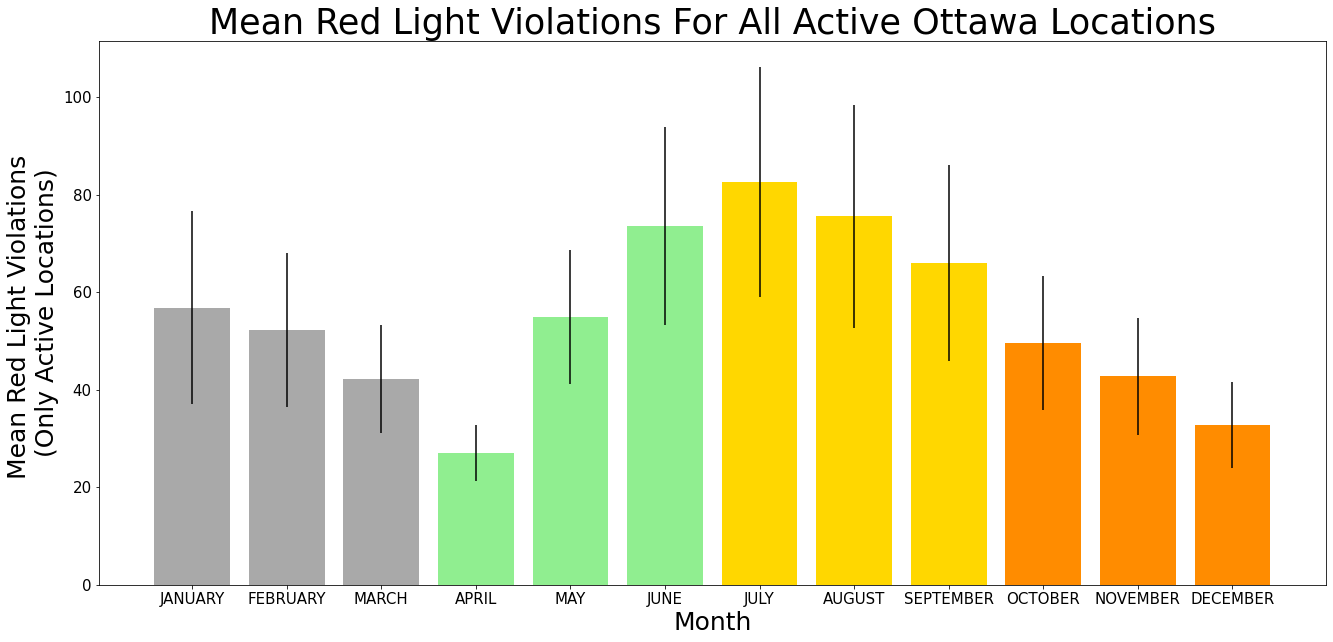

In [332]:
fig_active_months_mean = plt.figure(figsize=(22,10))
error = 2*all_monthly_stde_df['SE']
new_colours = ['darkgrey','darkgrey','darkgrey','lightgreen','lightgreen','lightgreen','gold','gold','gold','darkorange','darkorange','darkorange']
plt.bar(monthly_mean_df['Month'], monthly_mean_df['Mean'], yerr= error, color=new_colours)
plt.title('Mean Red Light Violations For All Active Ottawa Locations', fontsize=35)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Mean Red Light Violations \n(Only Active Locations)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

*Bar chart for `null_zero_monthly_mean_df` which looks at the mean number of red light violations for all locations per each month, where the null values have been penalized by setting them to zero:*

<function matplotlib.pyplot.show(close=None, block=None)>

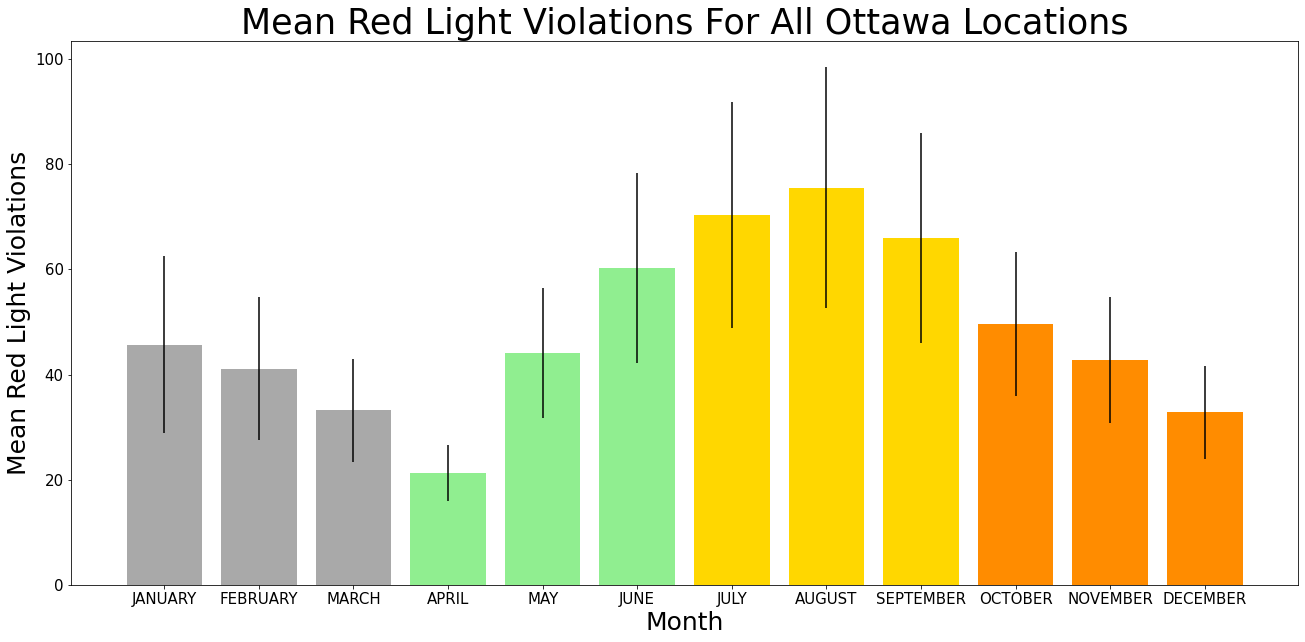

In [334]:
fig_all_months_mean = plt.figure(figsize=(22,10))
error = 2*null_zero_stde_df['SE']
new_colours = ['darkgrey','darkgrey','darkgrey','lightgreen','lightgreen','lightgreen','gold','gold','gold','darkorange','darkorange','darkorange']
plt.bar(null_zero_monthly_mean_df['Month'], null_zero_monthly_mean_df['Mean'], yerr= error, color=new_colours)
plt.title('Mean Red Light Violations For All Ottawa Locations', fontsize=35)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Mean Red Light Violations', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

*Double bar graph for `comparing_monthly_df` to show trends from both mean calculations: `Null_Disregarded` and `Null_Zero`*

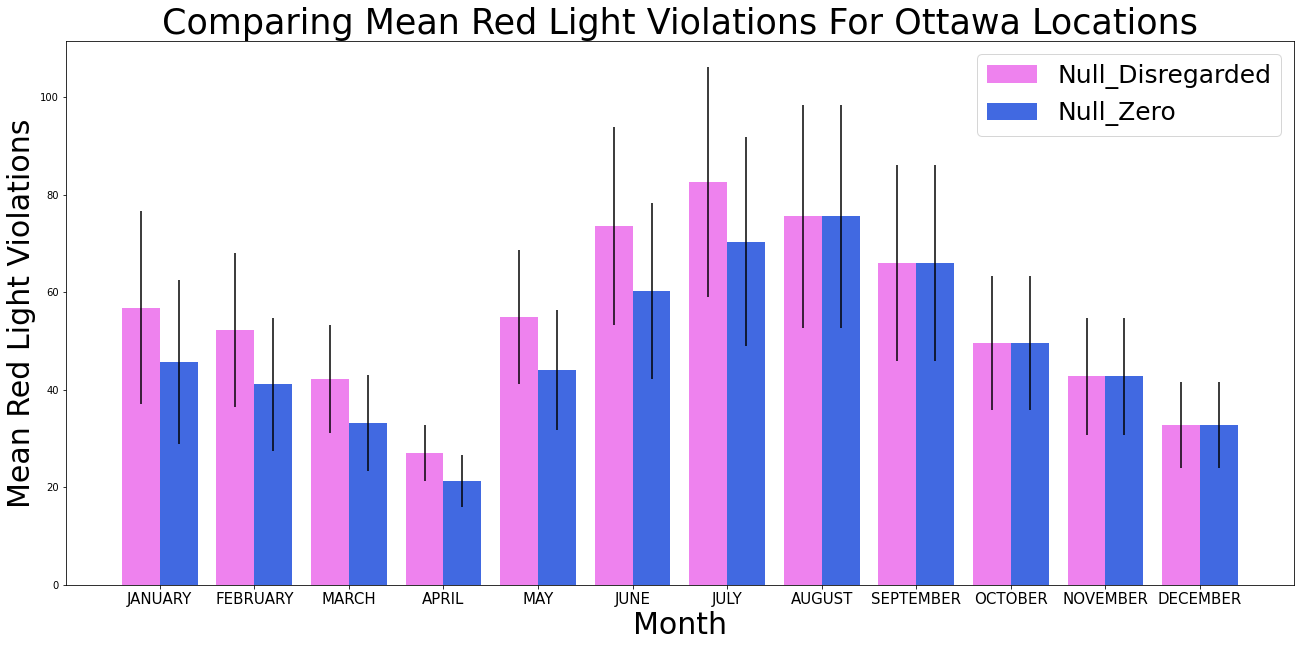

In [359]:
spaced_range = np.arange(12)
width = 0.4

all_location_error = 2*all_monthly_stde_df['SE']
null_zero_error = 2*null_zero_stde_df['SE']

fig = plt.figure(figsize=(22,10))
plt.bar(spaced_range, comparing_monthly_df['Null_Disregarded'], width = width,  yerr= all_location_error, label='Null_Disregarded', color='violet')
plt.bar(spaced_range + width, comparing_monthly_df['Null_Zero'], width = width, yerr= null_zero_error, label ='Null_Zero', color='royalblue')

plt.xticks(spaced_range + width/2, comparing_monthly_df['Month'], fontsize=15)
plt.title('Comparing Mean Red Light Violations For Ottawa Locations',fontsize=35)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Mean Red Light Violations', fontsize=30)
plt.legend(fontsize=25)
plt.show()


- - -

# Question 2) Which location(s) have the most violations?

**Beginning to look at the data from the location question perspective:**

In [20]:
highest_monthly_total_df = df.sort_values(by='HIGHEST_MONTHLY_TOTAL', ascending=False)

In [22]:
highest_monthly_total_df[['INTERSECTION','HIGHEST_MONTHLY_TOTAL']]

,INTERSECTION,HIGHEST_MONTHLY_TOTAL
11,KING EDWARD @ ST. PATRICK,466
27,KING EDWARD @ ST. ANDREW,347
60,RUSSELL @ ST-LAURENT,315
43,KENT @ ARLINGTON,314
51,HERON @ 155m W OF BANK,265
...,...,...
7,BOOTH @ WELLINGTON (RR40),0
46,MURRAY @ SUSSEX,0
36,CATHERINE @ KENT,0
17,BERRIGAN @ WESSEX / GREENBANK,0


In [34]:
print(df.loc[13])

INTERSECTION             ALBERT @ BOOTH
CAMERA_INSTALL_YEAR                2010
LATITUDE                      45.412918
LONGITUDE                    -75.712652
X                            366426.212
Y                           5030632.794
CAMERA_FACING                 Eastbound
JANUARY                             NaN
FEBRUARY                            NaN
MARCH                               NaN
APRIL                               NaN
MAY                                 NaN
JUNE                                NaN
JULY                                NaN
AUGUST                                0
SEPTEMBER                             0
OCTOBER                               0
NOVEMBER                              0
DECEMBER                              0
TOTAL_VIOLATIONS                      0
HIGHEST_MONTHLY_TOTAL                 0
ObjectId                             14
Name: 13, dtype: object


*Checking to see if there are any duplicates; there are no duplicates as cameras are facing different directions*

In [39]:
df[df['INTERSECTION'].str.contains('WESSEX')]

,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,MARCH,...,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId
17,BERRIGAN @ WESSEX / GREENBANK,2010,45.274975,-75.749006,363723.6849,5015276.436,Southbound,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,18
34,BERRIGAN @ WESSEX / GREENBANK,2016,45.274975,-75.749006,363723.6849,5015276.436,Northbound,34.0,75.0,41.0,...,71.0,70.0,68,76,61,54,64,715,76,35


*Adding column to original df that counts the number of null months per location*

In [51]:
df['NaN_Months'] = df.isnull().sum(axis=1)
df[['INTERSECTION','NaN_Months']]

,INTERSECTION,NaN_Months
0,WALKEY @ HAWTHORNE / RUSSELL,5
1,ST LAURENT @ BELFAST,0
2,CAMPEAU @ HWY 417 WB,0
3,CATHERINE @ KENT,5
4,BASELINE @ MERIVALE,0
...,...,...
56,BANK @ HUNT CLUB,7
57,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,7
58,CARLING @ IROQUOIS,7
59,KING EDWARD @ BESSERER,4


In [61]:
df['Active_Months'] = 12 - df['NaN_Months']

*Tested 3 rows and physically counted to ensure code worked*

In [62]:
df[['INTERSECTION','TOTAL_VIOLATIONS', 'NaN_Months', 'Active_Months']]

,INTERSECTION,TOTAL_VIOLATIONS,NaN_Months,Active_Months
0,WALKEY @ HAWTHORNE / RUSSELL,354,5,7
1,ST LAURENT @ BELFAST,357,0,12
2,CAMPEAU @ HWY 417 WB,480,0,12
3,CATHERINE @ KENT,223,5,7
4,BASELINE @ MERIVALE,280,0,12
...,...,...,...,...
56,BANK @ HUNT CLUB,49,7,5
57,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,44,7,5
58,CARLING @ IROQUOIS,454,7,5
59,KING EDWARD @ BESSERER,1419,4,8


*Calculating mean over active months for each location*

In [387]:
df['Mean_Active_Months'] = df['TOTAL_VIOLATIONS']/df['Active_Months']

In [388]:
df[['INTERSECTION','TOTAL_VIOLATIONS', 'NaN_Months', 'Active_Months', 'Mean_Active_Months']]

,INTERSECTION,TOTAL_VIOLATIONS,NaN_Months,Active_Months,Mean_Active_Months
0,WALKEY @ HAWTHORNE / RUSSELL,354,5,7,50.571429
1,ST LAURENT @ BELFAST,357,0,12,29.750000
2,CAMPEAU @ HWY 417 WB,480,0,12,40.000000
3,CATHERINE @ KENT,223,5,7,31.857143
4,BASELINE @ MERIVALE,280,0,12,23.333333
...,...,...,...,...,...
56,BANK @ HUNT CLUB,49,7,5,9.800000
57,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,44,7,5,8.800000
58,CARLING @ IROQUOIS,454,7,5,90.800000
59,KING EDWARD @ BESSERER,1419,4,8,177.375000


*Sorting dataframe in descending order of mean locations with active months*

In [389]:
highest_mean_monthly_total_df = df.sort_values(by='Mean_Active_Months', ascending=False)
highest_mean_monthly_total_df[['INTERSECTION','TOTAL_VIOLATIONS', 'NaN_Months', 'Active_Months', 'Mean_Active_Months']]

,INTERSECTION,TOTAL_VIOLATIONS,NaN_Months,Active_Months,Mean_Active_Months
11,KING EDWARD @ ST. PATRICK,3203,0,12,266.916667
27,KING EDWARD @ ST. ANDREW,2482,0,12,206.833333
60,RUSSELL @ ST-LAURENT,2221,0,12,185.083333
59,KING EDWARD @ BESSERER,1419,4,8,177.375000
43,KENT @ ARLINGTON,1935,0,12,161.250000
...,...,...,...,...,...
10,CARLING @ ISLAND PARK,51,0,12,4.250000
17,BERRIGAN @ WESSEX / GREENBANK,0,7,5,0.000000
36,CATHERINE @ KENT,0,7,5,0.000000
13,ALBERT @ BOOTH,0,7,5,0.000000


*Creating columns in the dataframe that rank the two sets of data comparing highest month and mean month for each location*

In [390]:
df['Mean_Monthly_Rnk']= df['Mean_Active_Months'].rank( ascending=False)
df['Highest_Monthly_Rnk']= df['HIGHEST_MONTHLY_TOTAL'].rank(ascending=False)
df[['INTERSECTION','HIGHEST_MONTHLY_TOTAL','Mean_Active_Months','Mean_Monthly_Rnk','Highest_Monthly_Rnk']]

,INTERSECTION,HIGHEST_MONTHLY_TOTAL,Mean_Active_Months,Mean_Monthly_Rnk,Highest_Monthly_Rnk
0,WALKEY @ HAWTHORNE / RUSSELL,72,50.571429,22.0,27.5
1,ST LAURENT @ BELFAST,45,29.750000,39.0,42.0
2,CAMPEAU @ HWY 417 WB,62,40.000000,29.0,32.0
3,CATHERINE @ KENT,54,31.857143,38.0,37.0
4,BASELINE @ MERIVALE,36,23.333333,46.0,47.0
...,...,...,...,...,...
56,BANK @ HUNT CLUB,16,9.800000,54.0,52.0
57,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,12,8.800000,55.0,55.0
58,CARLING @ IROQUOIS,141,90.800000,9.0,11.0
59,KING EDWARD @ BESSERER,251,177.375000,4.0,6.0


*Make scatterplot to see if there is a correlation between the highest month for each location and the mean for each location*